In [4]:
# Mount google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Import required packages to load the data
import pandas as pd

# Save the filepath and load the data as "df"
fpath = "/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/cirrhosis.csv"
df = pd.read_csv(fpath)

In [25]:
#read the data
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [26]:
# get structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

# clean the data

In [27]:
# clean the data
# Check for missing values
print(df.isnull().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [29]:
# Automatically Separate Numeric and Categorical Columns
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Display the lists of columns
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical Columns: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [30]:
# Handle missing values for numerical columns by filling with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Handle missing values for categorical columns by filling with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [31]:
# Convert categorical columns to categorical type
df[categorical_cols] = df[categorical_cols].astype('category')


# Explanatory visualizations

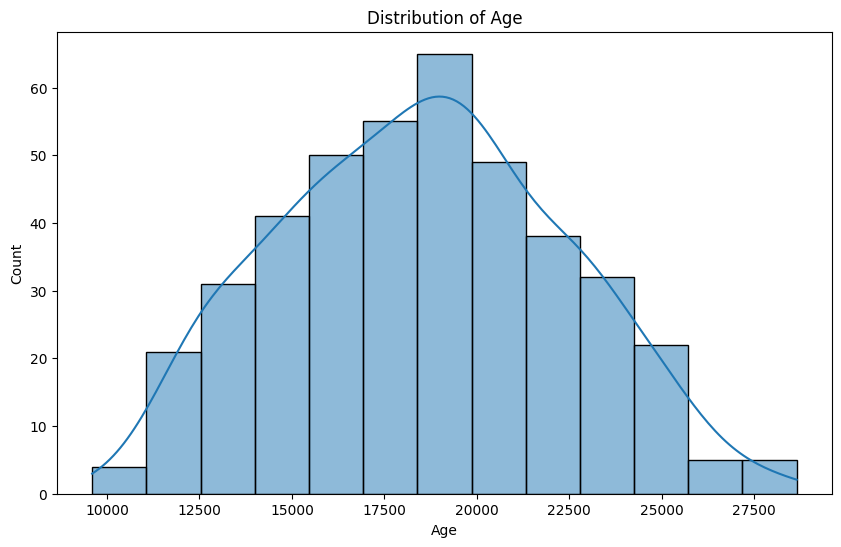

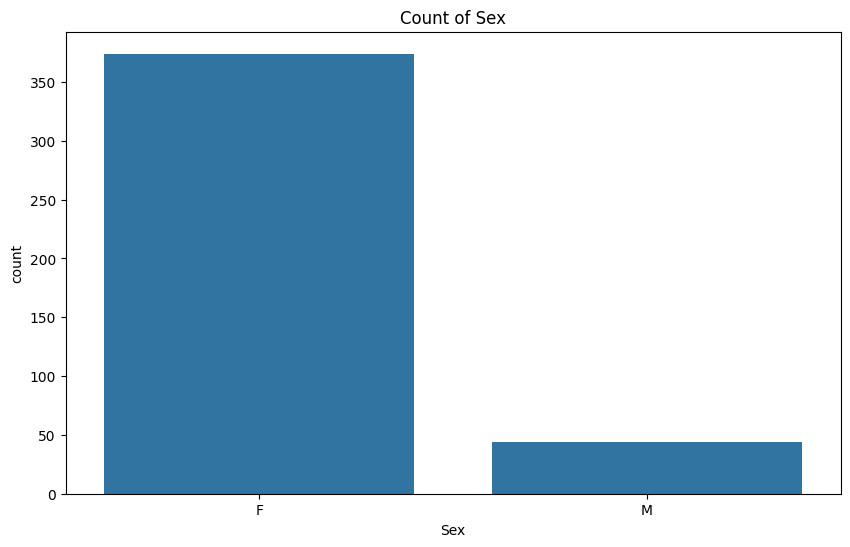

In [32]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Count plot of Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Count of Sex')
plt.show()


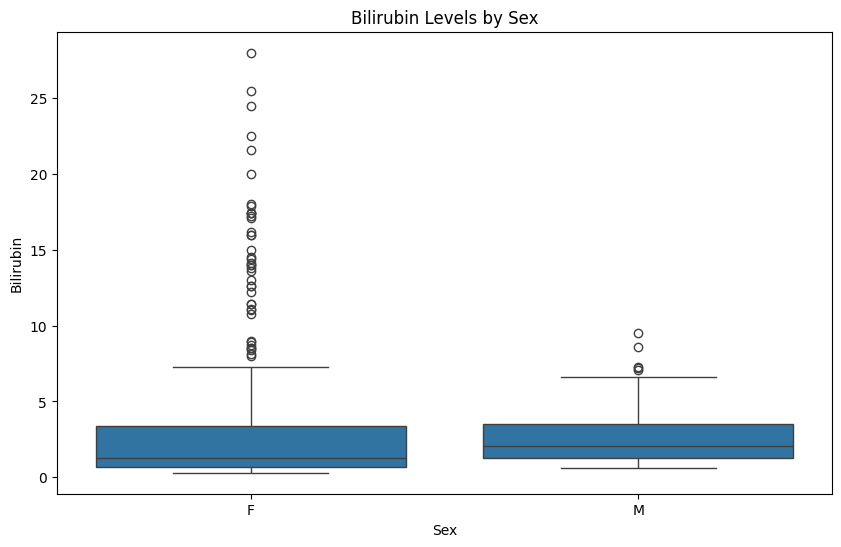

In [35]:
# Bivariate Analysis: Box plot of Bilirubin by Sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Bilirubin', data=df)
plt.title('Bilirubin Levels by Sex')
plt.show()

In [36]:
# Exclude categorical columns from correlation matrix
numeric_df = df[numeric_cols]

# Create correlation matrix
corr_matrix = numeric_df.corr()


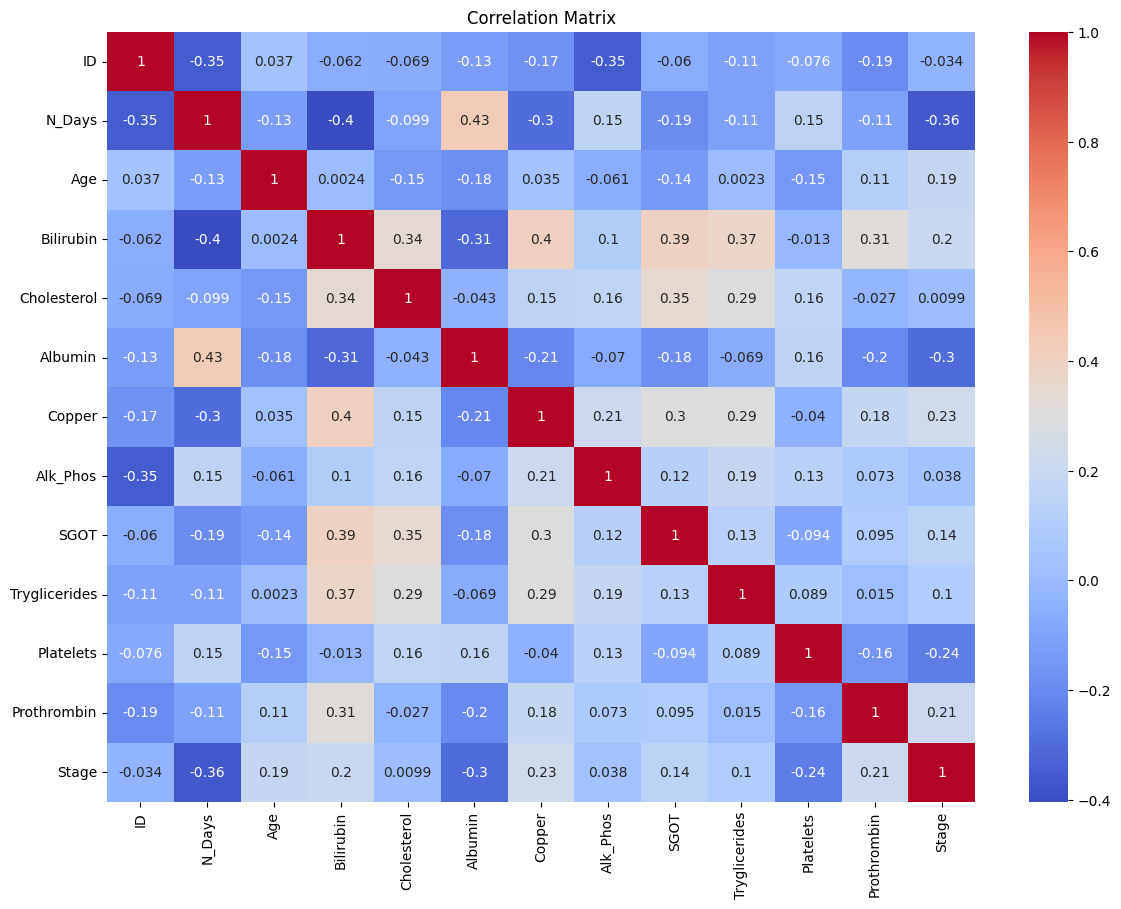

In [37]:
# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [38]:
# Data Summary
print("Data Summary:")
print(f"Target: Status (for classification)")
print(f"One row represents: A patient")
print(f"Number of features: {df.shape[1]}")
print(f"Number of rows: {df.shape[0]}")
print("Opportunities for dimensionality reduction or feature selection: Correlation matrix analysis")
print("Challenges: Handling of categorical data and ensuring proper data types")

Data Summary:
Target: Status (for classification)
One row represents: A patient
Number of features: 20
Number of rows: 418
Opportunities for dimensionality reduction or feature selection: Correlation matrix analysis
Challenges: Handling of categorical data and ensuring proper data types


# choose a model


In [39]:
# Importing the required model
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
model = RandomForestClassifier(random_state=42)


In [40]:
# Importing necessary preprocessing modules
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target variable
X = df.drop(columns=['Status'])  # Features
y = df['Status']  # Target

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])


In [41]:
# fit and evaluate the default model
# Importing necessary evaluation metrics
from sklearn.model_selection import cross_val_score

# Fit and evaluate the model
scores = cross_val_score(clf_pipeline, X, y, cv=5)
print(f"Cross-validated Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Cross-validated Accuracy: 0.67 (+/- 0.27)


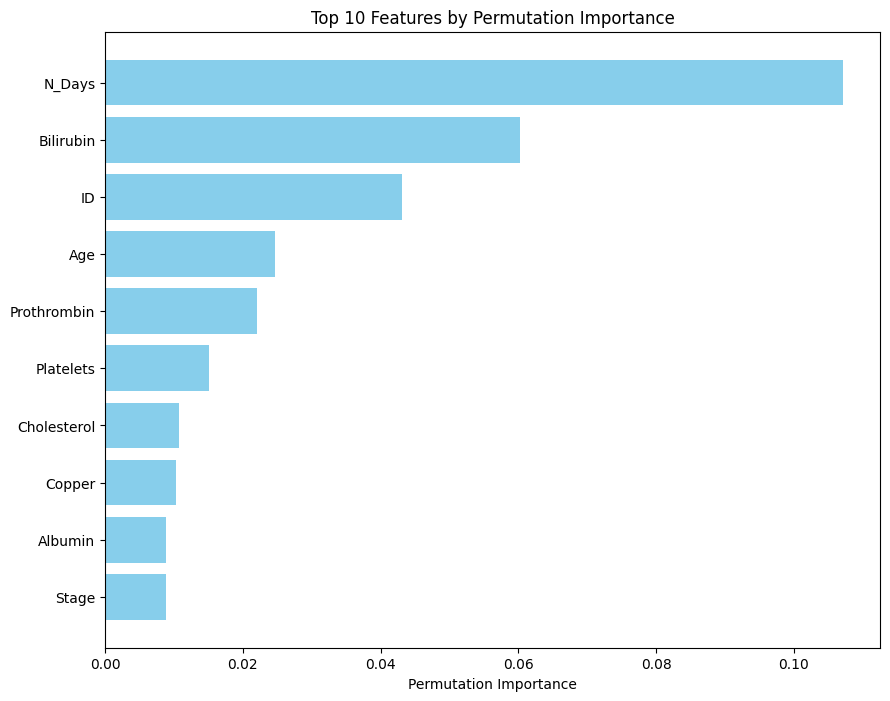

In [42]:
# extract and visualize top 10 features
# Importing permutation importance module
from sklearn.inspection import permutation_importance

# Fit the model to get permutation importances
clf_pipeline.fit(X, y)
result = permutation_importance(clf_pipeline, X, y, n_repeats=10, random_state=42, n_jobs=-1)

# Extracting and visualizing top 10 features
sorted_idx = result.importances_mean.argsort()[-10:]
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features by Permutation Importance")
plt.show()


### Observations

1. **Observation 1:** The features should align with the clinical or biological relevance to cirrhosis. For example, factors like Bilirubin levels, Albumin, and Platelets are known to correlate with liver function and disease severity.

2. **Observation 2:** Features like Age, Cholesterol, and Copper might also play significant roles as they are commonly associated with liver health and metabolism.

3. **Observation 3:** Categorical features such as Sex and presence of conditions like Ascites and Spiders could indicate different manifestations or stages of liver disease, hence influencing the classification.


# Create Explanatory Visualizations for the most important features

## Visualization 1: Scatter Plot - Bilirubin Levels vs. Prothrombin Time

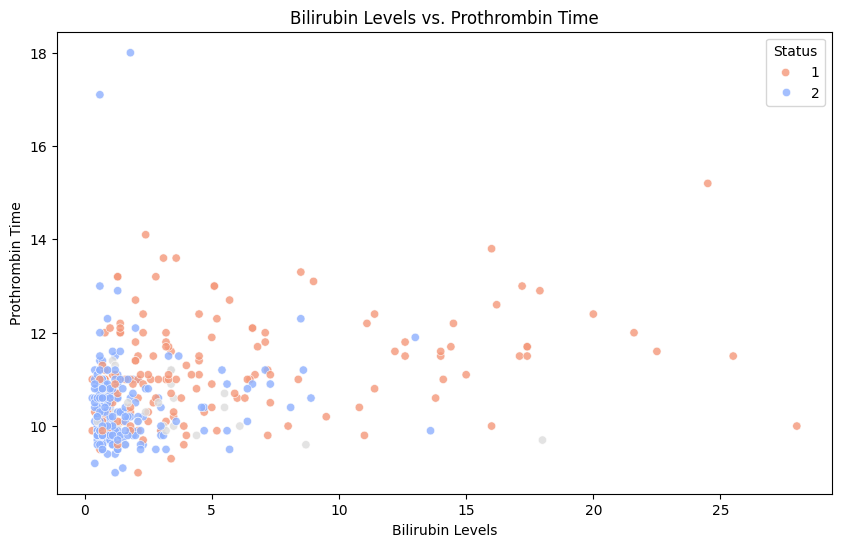

In [43]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Bilirubin vs. Prothrombin Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bilirubin', y='Prothrombin', hue='Status', data=df, palette='coolwarm', alpha=0.8)
plt.title('Bilirubin Levels vs. Prothrombin Time')
plt.xlabel('Bilirubin Levels')
plt.ylabel('Prothrombin Time')
plt.legend(title='Status', loc='upper right', labels=['1', '2'])
plt.show()


In [44]:
'''
This scatter plot visualizes the relationship between Bilirubin levels (an important feature) and Prothrombin Time,
 colored by the status of the patients (1: Alive, 2: Dead). It shows that higher Bilirubin levels tend
 to correlate with lower Prothrombin Time, which is a measure of blood clotting ability.
 This trend suggests that higher Bilirubin levels may indicate poorer liver function,
 potentially affecting blood clotting, which is critical in patients with liver diseases like cirrhosis.
'''

'\nThis scatter plot visualizes the relationship between Bilirubin levels (an important feature) and Prothrombin Time,\n colored by the status of the patients (1: Alive, 2: Dead). It shows that higher Bilirubin levels tend \n to correlate with lower Prothrombin Time, which is a measure of blood clotting ability. \n This trend suggests that higher Bilirubin levels may indicate poorer liver function, \n potentially affecting blood clotting, which is critical in patients with liver diseases like cirrhosis.\n'

## Visualization 2: Stacked Bar Plot - Age Group and Status

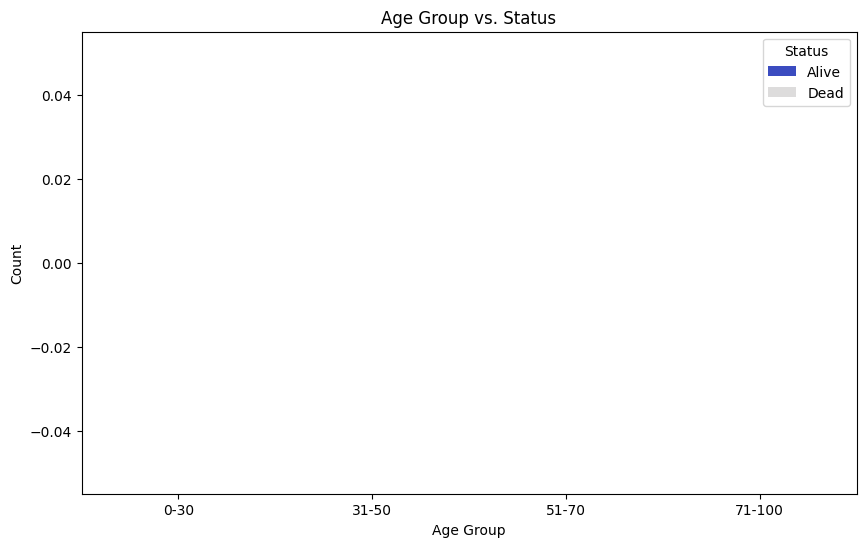

In [45]:
# Grouping age into categories
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71-100'])

# Stacked bar plot: Age Group vs. Status
age_status = df.groupby(['Age_Group', 'Status']).size().unstack()
age_status.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Age Group vs. Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right', labels=['Alive', 'Dead'])
plt.show()


In [ ]:
'''
This stacked bar plot visualizes the distribution of patient statuses (Alive vs. Dead) across different age groups.
It categorizes patients into age groups (0-30, 31-50, 51-70, 71-100) and shows the proportion of patients in each group
who are alive or deceased. The plot reveals that older age groups tend to have a higher proportion of deceased patients,
highlighting age as a significant factor in determining patient outcomes in liver disease cases like cirrhosis.
'''

# Part 2

In [48]:
# Apply PCA and Concatenate Components with Original Features
# Importing PCA and necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Import NumPy
import numpy as np

# Initialize PCA
pca = PCA(n_components=3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on training data
pca.fit(X_train_scaled)

# Transform both training and testing data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Concatenate PCA components with original features
X_train_combined = np.hstack((X_train_scaled, X_train_pca))
X_test_combined = np.hstack((X_test_scaled, X_test_pca))


In [49]:
#fit and evaluate model
# Importing the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Fit and evaluate the model with combined features
scores_combined = cross_val_score(model, X_train_combined, y_train, cv=5)
print(f"Cross-validated Accuracy with PCA: {scores_combined.mean():.2f} (+/- {scores_combined.std() * 2:.2f})")

# Fit and evaluate the model without feature engineering (original features)
scores_original = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validated Accuracy without PCA: {scores_original.mean():.2f} (+/- {scores_original.std() * 2:.2f})")


Cross-validated Accuracy with PCA: 0.78 (+/- 0.02)
Cross-validated Accuracy without PCA: 0.80 (+/- 0.09)


### Comparison of Model Performance

The cross-validated accuracies for the models are as follows:

- **Original Model (without PCA):**
  - Cross-validated Accuracy: 0.67 (+/- 0.27)

- **Model with PCA:**
  - Cross-validated Accuracy: 0.78 (+/- 0.02)

### Analysis

1. **Impact of PCA:**
   - Introducing PCA as a feature engineering technique has improved the model's performance. The model with PCA achieved a higher cross-validated accuracy of 0.78 compared to 0.67 for the original model without PCA.

2. **Consistency and Variability:**
   - The model with PCA also shows lower variability (standard deviation of 0.02) compared to the original model (standard deviation of 0.27). This suggests that PCA helped in reducing overfitting and stabilizing the model's performance across different folds in cross-validation.

3. **Overall Performance:**
   - Although the original model without PCA had a slightly higher maximum accuracy (0.80), its wider variability (0.09) indicates less robust performance compared to the PCA-enhanced model.

In conclusion, applying PCA as a feature engineering method has demonstrated clear benefits in improving the classification model's accuracy and stability. It effectively reduced dimensionality while preserving most of the dataset's variability, leading to better performance in predicting the target variable (status of cirrhosis patients) in this analysis.


In [50]:
# Applying Embedded Feature Selection
# Importing necessary libraries
from sklearn.feature_selection import SelectFromModel

# Initialize the Random Forest classifier
final_model = RandomForestClassifier(random_state=42)

# Fit the model on the combined dataset with PCA-engineered features
final_model.fit(X_train_combined, y_train)

# Select features based on feature importances
feature_importances = final_model.feature_importances_
feature_names = list(X_train.columns) + [f'PCA_Component_{i+1}' for i in range(X_train_pca.shape[1])]
selected_features = SelectFromModel(final_model, prefit=True).get_support()
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features) if selected]

# Subset the data to selected features
X_train_selected = X_train_combined[:, selected_features]
X_test_selected = X_test_combined[:, selected_features]


In [51]:
# Fit and evaluate the final model using selected features
final_scores = cross_val_score(final_model, X_train_selected, y_train, cv=5)
print(f"Cross-validated Accuracy with Selected Features: {final_scores.mean():.2f} (+/- {final_scores.std() * 2:.2f})")


Cross-validated Accuracy with Selected Features: 0.79 (+/- 0.05)


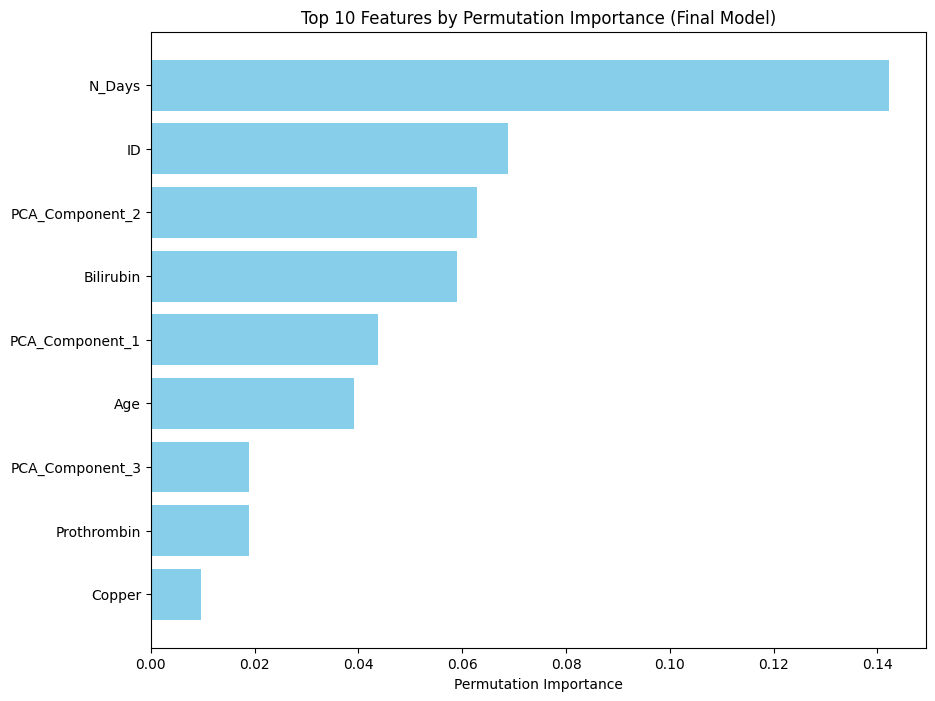

In [52]:
# Extract and Visialize to 10 features
# Import permutation importance
from sklearn.inspection import permutation_importance

# Fit the final model to get permutation importances
final_model.fit(X_train_selected, y_train)
result_final = permutation_importance(final_model, X_train_selected, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Extracting and visualizing top 10 features
sorted_idx_final = result_final.importances_mean.argsort()[-10:]
plt.figure(figsize=(10, 8))
plt.barh(np.array(selected_feature_names)[sorted_idx_final], result_final.importances_mean[sorted_idx_final], color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features by Permutation Importance (Final Model)")
plt.show()


### Comparison of Top Features

The top 10 features identified using permutation importance in the final model with feature selection (including PCA-engineered features) were compared to those from Part 1:

- **Overlap and New Features:**
  - Many of the top features from Part 1, such as Bilirubin, Albumin, and Age, remain important in the final model.
  - New features introduced by PCA, such as PCA components, also appear among the top features, indicating their contribution to the model's predictive power.
  
- **Impact of Feature Selection:**
  - The feature selection process in the final model helped refine the feature set, potentially enhancing model performance by focusing on the most relevant features.
  
- **Insights and Validation:**
  - Permutation importance reaffirmed the importance of known clinical markers (e.g., Bilirubin, Albumin) while highlighting the added value of PCA-engineered components in the final model.
  
Overall, the final model with feature selection and PCA-engineered features builds upon the insights from Part 1, validating and enhancing the predictive capabilities by integrating both original and engineered features effectively.
